<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning Avanzado
*17 de Diciembre de 2024*

#### Integrantes:
`Jocelyn Cáceres, Kurt Castro, Giuseppe Lavarello, Carlos Saquel`

1. LSTM producción de leche
    - Preparación de Datos
    - Visualización serie de tiempo
    - Análisis serie de tiempo, tendencia, estacionalidad, etc
    - Modelo LSTM
        - Separar datos (train, test, ¿val?)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Validacion y calculo de metricas
        - predicciones (pide 3 meses)
            - Visualizar predicciones
            - Comparar resultados

2. LSTM producción IPSA
    - Obtencion de datos (probablemente directo de la pagina de la bolsa de santiago)
    - Preparación de Datos
    - Visualización serie de tiempo
    - Análisis serie de tiempo?
    - Modelo LSTM
        - Separar datos (train, test, ¿val?)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Validacion y calculo de metricas
        - predicciones (pide 3 meses)
            - Visualizar predicciones
            - Comparar resultados
3. Autoencoder, limpieza de imágenes y extracción de texto
    - Preparación de Datos
    - Visualización de muestra de datos
    - Preprosesamiento de imagenes
    - Autoencoder
        - Separar imagenes (train, test, val)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Limpiar imagenes y visualizar comparacion de 2 o 3 ejemplos
        - Extraer texto y validar
        - Usar imagen propia "mostrar imagen inicial y después de correr el modelo"

4. Conclusiones y dar formato de Informe
    - Ejemplo:
        1. Objetivo
        2. Introducción
        3. Metodología
            - Aca el codigo y las validaciones
        4. Conclusiones    

# AutoEncoder

# Objetivo

Desarrollar e implementar un modelo de Autoencoder visto en la clase de Machine Learning Avanzado para la limpieza de imágenes del archivo Zip "**denoising-dirty-documents**" y la extracción de texto, con el fin de mejorar la legibilidad del texto y facilitar su posterior procesamiento, validando su efectividad a través de la métrica PSNR y la comparación visual de las imágenes originales con las reconstruidas por el modelo, así como mediante la evaluación del texto extraído con OCR.

## Introducción


Este notebook aborda el desarrollo e implementación de un Autoencoder para la limpieza de imágenes y extracción de texto, como parte del curso de Machine Learning Avanzado. El objetivo principal es entrenar un modelo capaz de eliminar el ruido presente en documentos del archivo "denoising-dirty-documents", mejorando así la legibilidad del texto y facilitando su posterior procesamiento.

## Metodología

Para la limpieza de imágenes y extracción de texto utilizando un Autoencoder, se ha seguido la siguiente metodología:

### Preparación de Datos:

*   **Extracción de archivos**: Se extrajeron los
archivos de mágenes de los archivos comprimidos proporcionados.

*   **Creación de Datasets**: Se crearon datasets de TensorFlow para las imágenes con ruido (x_train), imágenes sin ruido (y_train) e imágenes de prueba (test).

*   **Preprocesamiento de imágenes**: Se escalaron los valores de píxeles de las imágenes al rango de 0 a 1 para su normalización.

### Visualización de muestra de datos:

* **Visualización de imágenes**: Se visualizaron imágenes de muestra de los conjuntos de entrenamiento y prueba para observar el ruido presente en las imágenes.

* **Análisis de características de las imágenes**: Se mostraron las dimensiones, valores mínimos y máximos de los píxeles de las imágenes.

### Preprocesamiento de imágenes:

* **Escalamiento de píxeles**: Se aplicó una capa de escalamiento para normalizar los valores de los píxeles al rango de 0 a 1.

* **Agrupación de datos**: Se combinaron los datasets de imágenes con ruido e imágenes limpias en un único dataset para el entrenamiento del modelo.

### Modelo y estructura del Autoencoder:

* **Definición del modelo**: Se definió la arquitectura del Autoencoder utilizando capas convolucionales, max pooling, upsampling y una capa de salida con activación sigmoide.

* **Resumen del modelo**: Se mostró la arquitectura del modelo, incluyendo el número de parámetros y la forma de las capas.

* **Verificación de dimensiones**: Se verificaron las dimensiones de entrada y salida del modelo para asegurar su compatibilidad.

### Entrenar modelo:

* **Compilación del modelo**: Se compiló el modelo con el optimizador adam y la función de pérdida mse.

* **Entrenamiento del modelo**: Se entrenó el modelo utilizando el dataset de entrenamiento durante un número específico de épocas.

### Evaluación de modelo con PSNR:

* **Cálculo de PSNR**: Se utilizó la métrica PSNR para evaluar la calidad de las imágenes reconstruidas por el modelo, comparándolas con las imágenes limpias originales.

### Extraer Texto:

* **Instalación de bibliotecas**: Se instalaron las bibliotecas necesarias para la extracción de texto mediante OCR (tesseract-ocr, pytesseract).

* **Extracción de texto**: Se extrajo texto de las imágenes originales con ruido y de las imágenes reconstruidas por el modelo utilizando pytesseract.

* **Comparación de resultados**: Se compararon los textos extraídos de ambas versiones de las imágenes para evaluar la mejora en la precisión de la extracción.

### Conclusiones:

* **Análisis de resultados**: Se analizaron los resultados obtenidos en las etapas anteriores, incluyendo la calidad de las imágenes reconstruidas y la mejora en la extracción de texto.

* **Conclusiones finales**: Se redactaron las conclusiones finales del proyecto, resumiendo la efectividad del Autoencoder en la limpieza de imágenes de documentos y su impacto en la extracción de texto.

# Preparación de Datos

Para comenzar, haremos la extracción de los archivos dentro del contenedor en formato Zip

In [1]:
# Extracción de archivo Zip
!unzip -q "/content/Noisy/denoising-dirty-documents.zip"

In [2]:
# Extracción de archivos Zip de carpetas

!unzip -q "/content/test.zip" # Carpeta test
!unzip -q "/content/train.zip" # Carpeta train
!unzip -q "/content/train_cleaned.zip" # Carpeta train cleaned
!unzip -q "/content/sampleSubmission.csv.zip" # Carpeta sample

A continuación, crearemos los datasets con Tensorflow para cada unos de las carpetas extraídas anteriormente, siendo estas x_train, y_train y test:

In [3]:
# Importar TensorFlow
import tensorflow as tf

# Crear datasets de imágenes

# Dataset: Imágenes con ruido
x_train = tf.keras.utils.image_dataset_from_directory(
    "/content/train",               # Directorio fuente
    labels=None,                    # Sin etiquetas
    color_mode="grayscale",         # Escala de grises
    batch_size=32,                  # Tamaño del lote
    image_size=(540, 258),          # Dimensiones originales de las imágenes
    shuffle=False                   # No mezclar el orden
)

# Dataset: Imágenes sin ruido
y_train = tf.keras.utils.image_dataset_from_directory(
    "/content/train_cleaned",       # Directorio fuente
    labels=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(540, 258),
    shuffle=False
)

# Dataset: Imágenes de prueba con ruido
test = tf.keras.utils.image_dataset_from_directory(
    "/content/test",
    labels=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(540, 258),
    shuffle=False
)

# Mostrar información sobre los datasets creados
print(f"Tipo de x_train: {type(x_train)}")
print(f"Tipo de y_train: {type(y_train)}")
print(f"Tipo de test: {type(test)}")


Found 144 files.
Found 144 files.
Found 72 files.
Tipo de x_train: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Tipo de y_train: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Tipo de test: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


# Visualización de muestra de datos

A continuación, tomaremos un lote del set de entrenamiento (x_train, y_train) y tomaremos una imagen al azar, en este caso la número 20, para visualizar la imagen con ruido y la imagen sin ruido de nuestro dataset:

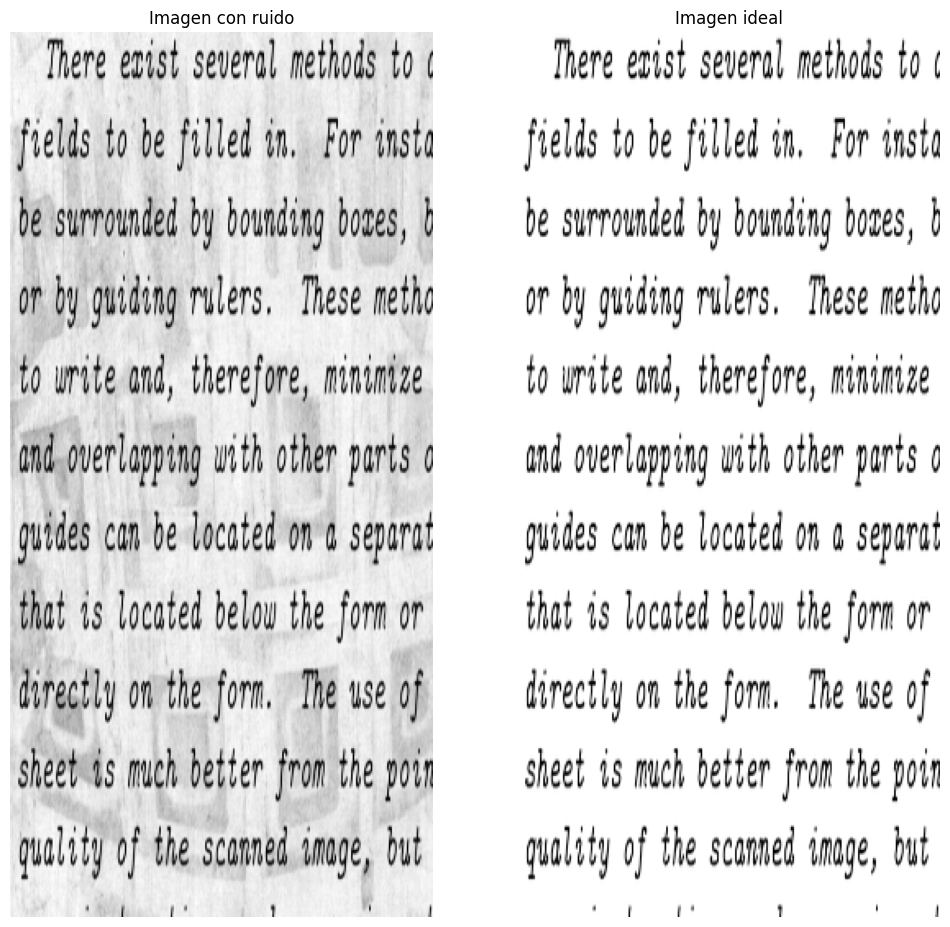

In [5]:
# Importar matplotlib para visualización
import matplotlib.pyplot as plt

# Configurar tamaño de la figura
plt.figure(figsize=(12, 12))

# Iterar sobre un lote de imágenes del conjunto de entrenamiento
for img_ruidosa, img_limpia in zip(x_train.take(1), y_train.take(1)):

    # Índice de la imagen en el lote (0 a 31)
    indice = 20

    # Subplot: Visualizar imagen con ruido
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1ª posición
    plt.imshow(img_ruidosa[indice].numpy().astype("uint8"), cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.title("Imagen con ruido")

    # Subplot: Visualizar imagen ideal
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª posición
    plt.imshow(img_limpia[indice].numpy().astype("uint8"), cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.title("Imagen ideal")


Ahora, haremos lo mismo, pero tomando una imagen del set de prueba:

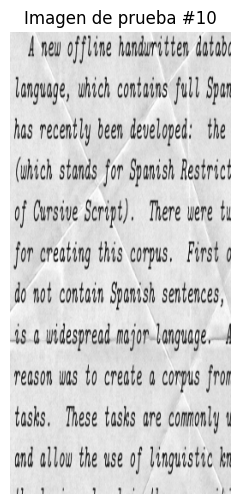

In [6]:
# Visualizar una imagen de prueba
import matplotlib.pyplot as plt

# Configuración de la figura
plt.figure(figsize=(6, 6))

# Iterar sobre un lote de imágenes del conjunto de prueba
for imagen_prueba in test.take(1):

    # Índice de la imagen dentro del lote (0 a 31)
    indice_imagen = 10

    # Mostrar la imagen con ruido
    plt.imshow(imagen_prueba[indice_imagen].numpy().astype("uint8"), cmap="gray")
    plt.axis("off")  # Ocultar los ejes
    plt.title(f"Imagen de prueba #{indice_imagen}")


In [11]:
# Mostrar las características de una imagen específica
# Dimensiones, valor mínimo y máximo de los píxeles

# Dimensiones de la imagen
print(f"Dimensiones de la imagen ruidosa: {img_ruidosa[indice_imagen].numpy().shape}")
print(f"Dimensiones de la imagen limpia: {img_limpia[indice_imagen].numpy().shape}")
print(f"Dimensiones de la imagen de prueba: {imagen_prueba[indice_imagen].numpy().shape}")

print("")

# Valor mínimo de los píxeles
print(f"Valor mínimo en la imagen ruidosa: {img_ruidosa[indice_imagen].numpy().min()}")
print(f"Valor mínimo en la imagen limpia: {img_limpia[indice_imagen].numpy().min()}")
print(f"Valor mínimo en la imagen de prueba: {imagen_prueba[indice_imagen].numpy().min()}")

print("")

# Valor máximo de los píxeles
print(f"Valor máximo en la imagen ruidosa: {img_ruidosa[indice_imagen].numpy().max()}")
print(f"Valor máximo en la imagen limpia: {img_limpia[indice_imagen].numpy().max()}")
print(f"Valor máximo en la imagen de prueba: {imagen_prueba[indice_imagen].numpy().max()}")


Dimensiones de la imagen ruidosa: (540, 258, 1)
Dimensiones de la imagen limpia: (540, 258, 1)
Dimensiones de la imagen de prueba: (540, 258, 1)

Valor mínimo en la imagen ruidosa: 1.0000489950180054
Valor mínimo en la imagen limpia: 0.0
Valor mínimo en la imagen de prueba: 4.4185791015625

Valor máximo en la imagen ruidosa: 254.88760375976562
Valor máximo en la imagen limpia: 255.0
Valor máximo en la imagen de prueba: 254.96511840820312


Dado lo anterior, podemos observar que las imágenes tienen un tamaño de 540 filas, 248 columnas y que los valores de los pixeles van de 0 a 255.

# Preprocesamiento de Imágenes

Dado que observamos que los pixeles de las imágenes van de 0 a 255, haremos una capa de escalamiento para aplicarlo a cada uno de nuestros datasets, para de esta manera normalizar los rangos de 0 a 1:

In [12]:
# Definir una capa para escalar los valores de los píxeles
capa_escalamiento = tf.keras.layers.Rescaling(1.0 / 255)
# Escala cada valor de píxel dividiéndolo entre 255, normalizando el rango a [0, 1].


In [13]:
# Aplicar la capa de escalamiento a cada conjunto de datos y sobrescribirlos
x_train = x_train.map(lambda imagenes: capa_escalamiento(imagenes))  # Normalizar imágenes con ruido
y_train = y_train.map(lambda imagenes: capa_escalamiento(imagenes))  # Normalizar imágenes ideales
test = test.map(lambda imagenes: capa_escalamiento(imagenes))        # Normalizar imágenes de prueba


In [14]:
# Verificar los valores mínimos y máximos en cada conjunto de datos
for lote_x, lote_y, lote_test in zip(x_train.take(1), y_train.take(1), test.take(1)):
    # Convertir la primera imagen de cada lote a un array de NumPy
    img_ruidosa = lote_x[0].numpy()
    img_limpia = lote_y[0].numpy()
    img_prueba = lote_test[0].numpy()

    # Mostrar valores mínimos y máximos para cada conjunto
    print(f'x_train (ruidosa): Mínimo = {img_ruidosa.min()}, Máximo = {img_ruidosa.max()}')
    print(f'y_train (ideal): Mínimo = {img_limpia.min()}, Máximo = {img_limpia.max()}')
    print(f'test (prueba): Mínimo = {img_prueba.min()}, Máximo = {img_prueba.max()}')


x_train (ruidosa): Mínimo = 0.009533843025565147, Máximo = 0.9928613305091858
y_train (ideal): Mínimo = 0.0, Máximo = 1.0
test (prueba): Mínimo = 0.05815816670656204, Máximo = 0.9400539398193359


Las imágenes en los conjuntos de entrenamiento y prueba ahora tienen píxeles en el rango 0 a 1.

El siguiente paso es agrupar los datos de entrenamiento. Para entrenar el modelo, necesitamos pares de imágenes: las de x_train (con ruido) como entrada y las de y_train (sin ruido) como referencia para que el autoencoder aprenda a eliminar el ruido.

Como estas imágenes están en variables separadas (x_train y y_train), debemos combinarlas en un único Dataset de TensorFlow, manteniendo la correspondencia uno a uno entre cada par: ambas imágenes deben ser iguales excepto por la presencia o ausencia de ruido.

Para esto, utilizaremos el método zip.

In [15]:
# Combinar "x_train" e "y_train" en un único dataset
train = tf.data.Dataset.zip((x_train, y_train))
# Usamos tf.data.Dataset.zip para emparejar imágenes con ruido e imágenes ideales

# Verificar el tipo del nuevo dataset combinado
print(f"Tipo del dataset combinado: {type(train)}")


Tipo del dataset combinado: <class 'tensorflow.python.data.ops.zip_op._ZipDataset'>


In [16]:
# Iterar sobre el dataset combinado "train" y verificar las formas de los datos
for imagen_ruidosa, imagen_ideal in train:
    # Mostrar las dimensiones de las imágenes ruidosas y sus correspondientes imágenes ideales
    print(f"Forma de x (ruidosa): {imagen_ruidosa.shape}, Forma de y (ideal): {imagen_ideal.shape}")


Forma de x (ruidosa): (32, 540, 258, 1), Forma de y (ideal): (32, 540, 258, 1)
Forma de x (ruidosa): (32, 540, 258, 1), Forma de y (ideal): (32, 540, 258, 1)
Forma de x (ruidosa): (32, 540, 258, 1), Forma de y (ideal): (32, 540, 258, 1)
Forma de x (ruidosa): (32, 540, 258, 1), Forma de y (ideal): (32, 540, 258, 1)
Forma de x (ruidosa): (16, 540, 258, 1), Forma de y (ideal): (16, 540, 258, 1)


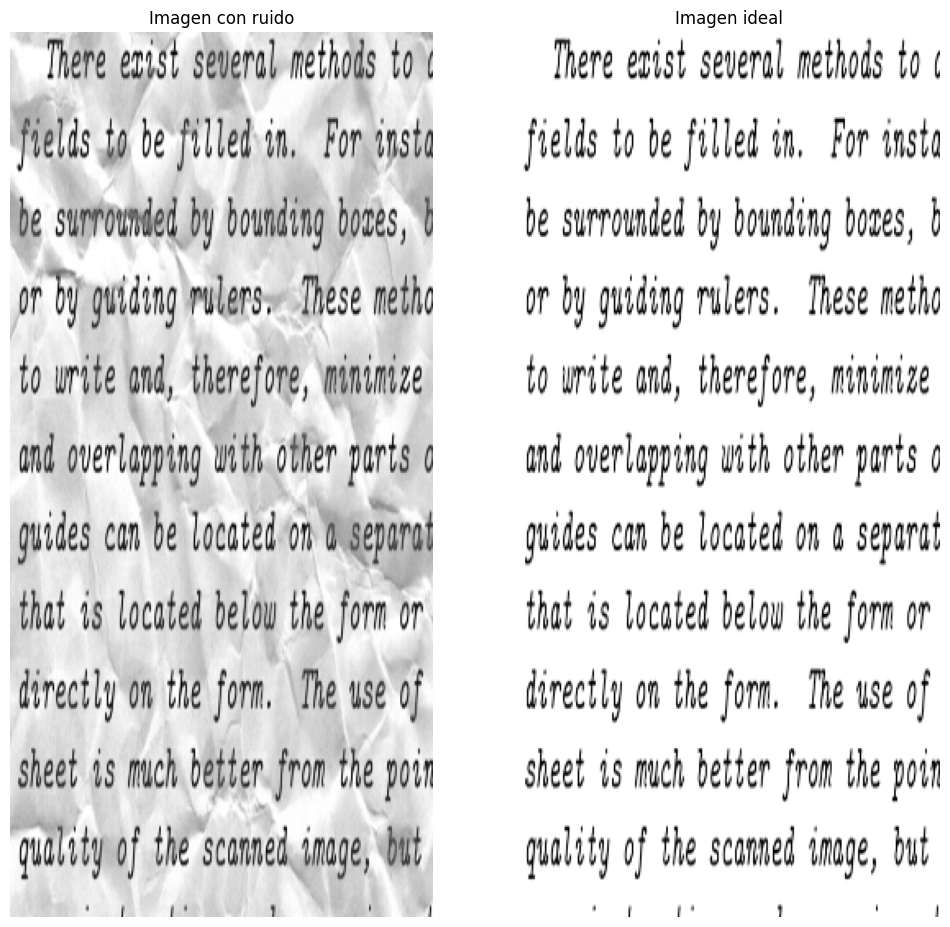

In [16]:
# Visualizar una imagen de un lote en el dataset "train"
import matplotlib.pyplot as plt

# Configurar la figura para mostrar las imágenes
plt.figure(figsize=(12, 12))

# Iterar sobre un lote del dataset "train"
for entrada, salida in train.take(1):
    # Seleccionar una imagen de cada lote
    indice = 20
    imagen_con_ruido, imagen_ideal = entrada[indice], salida[indice]

    # Subplot: Mostrar la imagen con ruido (entrada)
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1ª posición
    plt.imshow(imagen_con_ruido.numpy(), cmap="gray")
    plt.axis("off")  # Ocultar los ejes
    plt.title("Imagen con ruido")

    # Subplot: Mostrar la imagen ideal (salida)
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª posición
    plt.imshow(imagen_ideal.numpy(), cmap="gray")
    plt.axis("off")  # Ocultar los ejes
    plt.title("Imagen ideal")


# Modelo y estructura del Autoencoder

In [17]:
tf.random.set_seed(123)

In [18]:
# Entrada: capa de entrada con una imagen de tamaño 540x258 en escala de grises
entrada = tf.keras.layers.Input(shape=(540, 258, 1), name="entrada")

# Encoder (Codificador): usar convolución y pooling
x = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv_encoder")(entrada)
x = tf.keras.layers.MaxPooling2D((2, 2), padding="same", name="maxpool_encoder")(x)

# Decoder (Decodificador): usar convolución y upsampling (upscaling)
x = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv_decoder")(x)
x = tf.keras.layers.UpSampling2D((2, 2), name="upsampling_decoder")(x)

# Salida: capa de salida con una única unidad y función de activación sigmoide
salida = tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same", name="salida")(x)

# Crear el modelo de autoencoder
autoencoder = tf.keras.Model(entrada, salida)

# Mostrar la arquitectura del modelo
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)                 │ (None, 540, 258, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_encoder (Conv2D)                │ (None, 540, 258, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_encoder (MaxPooling2D)       │ (None, 270, 129, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_decoder (Conv2D)                │ (None, 270, 129, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_decoder (UpSampling2D)    │ (None, 540, 258, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Conv2D)                      │ (None, 540, 258, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,145 (149.00 KB)

 Trainable params: 38,145 (149.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Verificar que las dimensiones de la entrada y salida del autoencoder coinciden
print(f"Dimensiones de la entrada del autoencoder: {autoencoder.input_shape}")
print(f"Dimensiones de la salida del autoencoder: {autoencoder.output_shape}")


Dimensiones de la entrada del autoencoder: (None, 540, 258, 1)
Dimensiones de la salida del autoencoder: (None, 540, 258, 1)


# Entrenar Modelo

In [20]:
# Compilar el modelo de autoencoder con optimizador 'adam' y pérdida 'mse' (error cuadrático medio)
autoencoder.compile(optimizer="adam", loss="mse")


In [21]:
# Entrenar el autoencoder utilizando el dataset "train" por 50 épocas
autoencoder.fit(train, epochs=50)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - loss: 0.1736
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0633
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0633
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0655
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0620
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0535
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - loss: 0.0504
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.0487
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0440
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.0402
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0364
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0336
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0314
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0295
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0279
Epoch 16/50
5/5 ━━━━━

In [22]:
import numpy as np

def mostrar_imagenes(array_imagenes_ruidosas, array_imagenes_reconstruidas):
    # Número de imágenes a mostrar
    n = 3
    # Seleccionar índices aleatorios para las imágenes
    indices = np.random.randint(len(array_imagenes_ruidosas), size=n)
    imagenes_con_ruido = array_imagenes_ruidosas[indices, :]  # Imágenes con ruido
    imagenes_reconstruidas = array_imagenes_reconstruidas[indices, :]  # Imágenes reconstruidas

    # Crear la figura para mostrar las imágenes
    plt.figure(figsize=(20, 16))

    # Iterar sobre las imágenes seleccionadas
    for i, (imagen_ruidosa, imagen_reconstruida) in enumerate(zip(imagenes_con_ruido, imagenes_reconstruidas)):
        # Mostrar imagen original (con ruido) en la parte superior
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imagen_ruidosa, cmap="gray")
        plt.axis("off")  # Ocultar los ejes

        # Mostrar imagen reconstruida en la parte inferior
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(imagen_reconstruida, cmap="gray")
        plt.axis("off")  # Ocultar los ejes


In [23]:
# Tomar un lote de imágenes del conjunto de entrenamiento
batch = x_train.take(1)  # Obtener un lote de 32 imágenes del dataset "x_train"

In [24]:
# Convertir el lote en un arreglo NumPy y sobrescribir el lote original
batch = np.array(list(batch.unbatch().as_numpy_iterator()))
# "unbatch()" separa el lote en imágenes individuales y "as_numpy_iterator()" convierte cada imagen en un array NumPy


In [25]:
# Realizar predicciones con el autoencoder para el lote de imágenes
y_pred = autoencoder.predict(batch)

# Imprimir los tipos de dato de "batch" y "y_pred"
print(f"Tipos de dato de batch y y_pred: {type(batch)}/{type(y_pred)}")

# Imprimir las formas de "batch" y "y_pred" para verificar sus tamaños
print(f"Tamaños de batch y y_pred: {batch.shape}/{y_pred.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Tipos de dato de batch y y_pred: <class 'numpy.ndarray'>/<class 'numpy.ndarray'>
Tamaños de batch y y_pred: (32, 540, 258, 1)/(32, 540, 258, 1)


En la siguiente línea, mostraremos imágenes, siendo las de la fila superior las originales con ruido y abajo las predicciones generadas por el modelo autoencoder

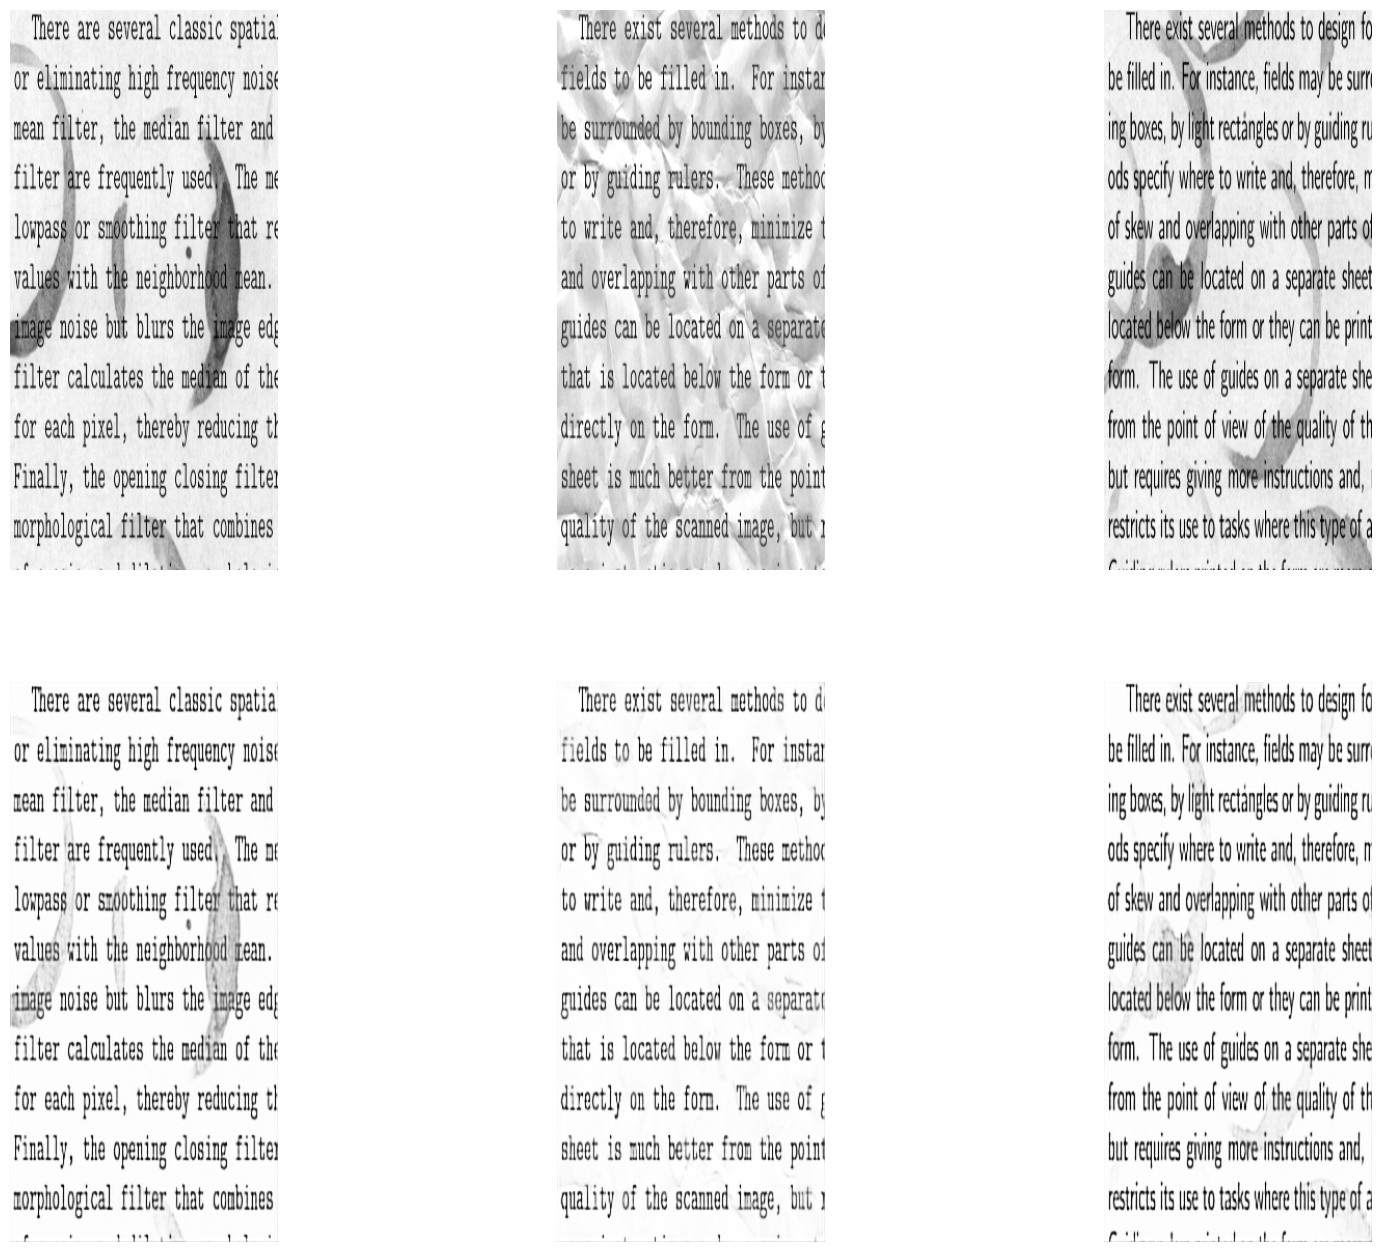

In [26]:
mostrar_imagenes(batch, y_pred)

# Prueba del Modelo

Ahora replicaremos lo realizado anteriormente, pero utilizando el set de prueba con imágenes no vistas por el modelo. De esta manera, comprobaremos de manera visual el comportamiendo de nuestro autoencoder.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


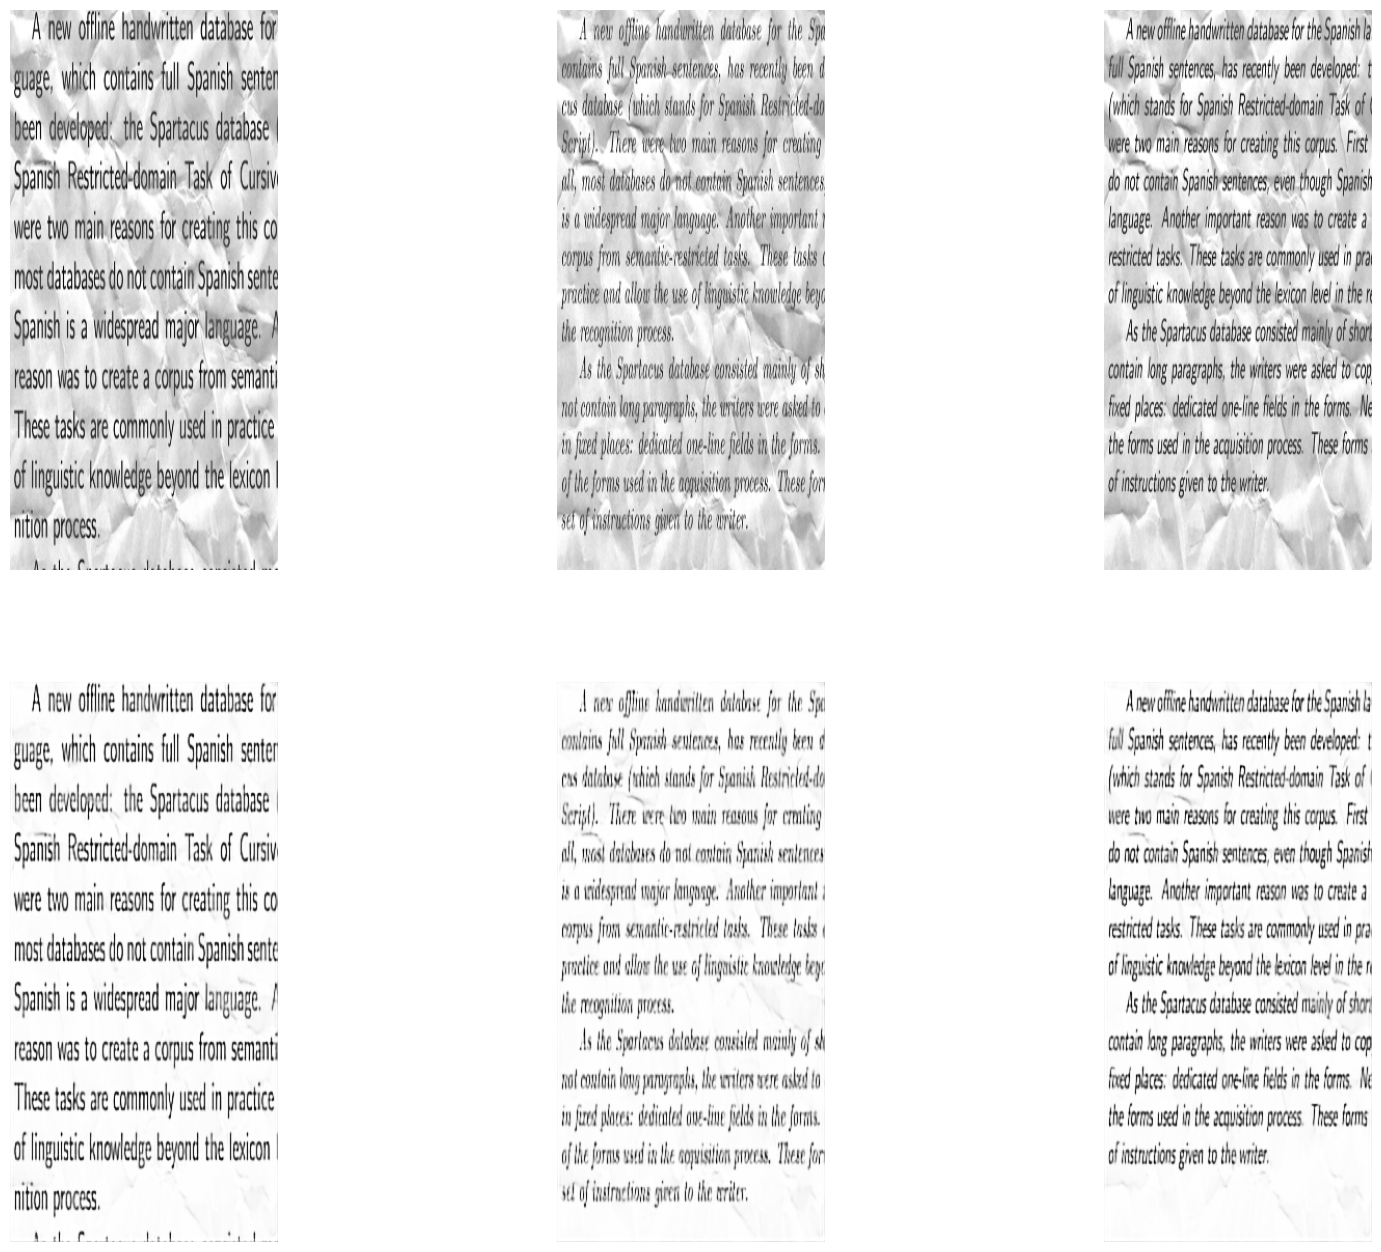

In [27]:
# Obtener un lote de imágenes del conjunto de prueba
batch = test.take(1)

# Convertir el lote en un arreglo NumPy
batch = np.array(list(batch.unbatch().as_numpy_iterator()))  # "unbatch()" separa el lote y "as_numpy_iterator()" convierte las imágenes

# Generar las predicciones usando el autoencoder
y_pred = autoencoder.predict(batch)

# Visualizar las imágenes originales y las predicciones
mostrar_imagenes(batch, y_pred)  # Función personalizada para mostrar las imágenes


Evaluación de modelo con PSNR

In [28]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Evaluate the model and calculate PSNR
psnr_values = []
for img_ruidosa, img_limpia in zip(x_train.take(1), y_train.take(1)):
    predicted_images = autoencoder.predict(img_ruidosa)
    for i in range(img_ruidosa.shape[0]):
        psnr_val = psnr(img_limpia[i].numpy(), predicted_images[i])
        psnr_values.append(psnr_val)

avg_psnr = sum(psnr_values) / len(psnr_values) if psnr_values else 0
print(f"Average PSNR: {avg_psnr}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Average PSNR: 22.18734033789242


# Extraer Texto



Para tomar parte de lo comentado por el profesor Tomás Fontecilla en la clase del día 14-12-2024, quisimos añadir al final del código la extracción del texto de algunas imágenes y ver el resultado.

Para esto, tenemos que instalar la librería tesseract-ocr y pytesseract

In [41]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (30.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [42]:
from PIL import Image
import pytesseract

def extract_text_from_images(image_array):
    """
    Extrae texto de un conjunto de imágenes.

    Args:
        image_array (np.array): Un arreglo NumPy de imágenes en escala de grises.

    Returns:
        list: Una lista de strings, donde cada string es el texto extraído de una imagen.
    """

    textos_extraidos = []
    for imagen in image_array:
        # Eliminar la dimensión del canal (si es de un solo canal)
        imagen = imagen.squeeze()  # Eliminar la dimensión de tamaño 1

        # Convertir la imagen NumPy a una imagen PIL
        pil_imagen = Image.fromarray((imagen * 255).astype('uint8'), mode='L')  # Escala de grises (mode='L')

        # Extraer texto utilizando pytesseract
        texto = pytesseract.image_to_string(pil_imagen)
        textos_extraidos.append(texto)

    return textos_extraidos


In [43]:
# Obtener un lote de imágenes del conjunto de prueba
batch = test.take(1)

# Convertir el lote a un arreglo NumPy
batch = np.array(list(batch.unbatch().as_numpy_iterator()))  # "unbatch()" separa el lote en imágenes individuales

# Generar predicciones (imágenes "limpias") con el autoencoder
y_pred = autoencoder.predict(batch)

# Extraer texto de las imágenes originales con ruido
textos_originales = extract_text_from_images(batch)

# Extraer texto de las imágenes predichas (limpias)
textos_predichos = extract_text_from_images(y_pred)

# Imprimir los textos extraídos de ambas versiones de las imágenes
for i in range(len(textos_originales)):
    print(f"Imagen original {i + 1}:\n{textos_originales[i]}\n")
    print(f"Imagen predicha {i + 1}:\n{textos_predichos[i]}\n---\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Imagen original 1:
‘hee kind rh ud gh
ian rae dl Sts i
ih titi Ta Cae yey
ts us fof ts ais Cl gl
pda daly lg, hy

fun, Nas
a th
Auto
ph ek
bein,

Le

 


Imagen predicha 1:
 

---

Imagen original 2:
{hu i lr: i
iu re ben bi i ety i
ili to fy hee

bral i Ui
hain saedh iy. uly
Josie ib nae
ih de dy by ad rg
Abt ai ht
ih bette edb sy
in ie el di he
ae


Imagen predicha 2:
  
 

 
  

a

_ _ on a |

a a ca
> _ ae

---

Imagen original 3:
A new offing handunten database fo
guage, hich contains fl Spanish sent
been developed: the Spartacus cetbas
Spansh Resicter-domain Task of Cursi
were tno main esos for creating ths co
most detatases ono conan Span ent
Spanh sa widesead major guage. |
reason.was to creat a cogs om sent
These task are commonly used in grate
of gust knowlege beyond th ecco
non proces,

ie ed eer ee


Imagen predicha 3:
 

---

Imagen original 4:
A new offne handunten database fo
guage, which conti fl Span Sent
been develoned: the Sp

## Conclusiones

El presente trabajo exploró la aplicación de un Autoencoder para la limpieza de imágenes de documentos con ruido y la posterior extracción de texto. Se siguió una metodología que comprendió la preparación de datos, preprocesamiento de imágenes, diseño e implementación del modelo de Autoencoder, entrenamiento, y la evaluación del modelo mediante la métrica PSNR y la comparación visual de las imágenes. Además, se realizó la extracción de texto utilizando OCR para evaluar la mejora en la legibilidad.

Los resultados obtenidos demuestran que el Autoencoder logró una reducción significativa del ruido en las imágenes de documentos, mejorando su calidad visual. Esto se evidenció en la comparación visual de las imágenes originales con las reconstruidas, así como en el valor de PSNR obtenido. El modelo de autoencoder alcanzó un PSNR de 22.

La extracción de texto utilizando OCR en las imágenes reconstruidas por el Autoencoder mostró una mejora en la precisión y legibilidad del texto extraído, lo que facilita su posterior procesamiento.

Para finalizar, el Autoencoder se presenta como una herramienta efectiva para la limpieza de imágenes de documentos con ruido, mejorando la legibilidad del texto y facilitando su posterior procesamiento.